# Myopia Clusters

In this notebook I attempt to cluster a myopia dataset into discernable groups using various unsupervised machine learning algorithms.  

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# PART 1: Prepare the Data

In [2]:
df = pd.read_csv("myopia.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AGE        618 non-null    int64  
 1   SPHEQ      618 non-null    float64
 2   AL         618 non-null    float64
 3   ACD        618 non-null    float64
 4   LT         618 non-null    float64
 5   VCD        618 non-null    float64
 6   SPORTHR    618 non-null    int64  
 7   READHR     618 non-null    int64  
 8   COMPHR     618 non-null    int64  
 9   STUDYHR    618 non-null    int64  
 10  TVHR       618 non-null    int64  
 11  DIOPTERHR  618 non-null    int64  
 12  MOMMY      618 non-null    int64  
 13  DADMY      618 non-null    int64  
 14  MYOPIC     618 non-null    int64  
dtypes: float64(5), int64(10)
memory usage: 72.5 KB


In [4]:
df.sample(10)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
136,6,1.170,23.400000,3.452,3.738,16.209999,10,0,0,0,10,10,0,0,0
96,7,0.688,22.389999,3.464,3.738,15.180000,22,0,0,0,27,27,0,1,0
92,6,0.721,23.549999,3.822,3.598,16.129999,4,0,2,0,14,18,1,1,0
202,6,0.321,22.770000,3.598,3.626,15.540000,7,4,4,1,4,27,0,1,0
536,6,0.833,22.530001,3.744,3.482,15.300000,20,3,2,3,8,30,1,0,0
339,7,1.322,22.379999,3.396,3.528,15.450000,6,0,4,2,12,26,0,1,0
544,7,0.429,22.870001,3.956,3.570,15.340000,15,5,2,5,7,41,0,1,0
90,7,0.754,23.500000,3.624,3.468,16.410000,26,0,0,0,8,8,0,0,0
137,6,0.964,22.049999,3.544,3.364,15.150000,10,2,0,0,10,16,1,0,0
4,5,0.697,23.290001,3.676,3.454,16.160000,14,0,0,0,4,4,1,0,0


In [5]:
df["MYOPIC"].value_counts()

0    537
1     81
Name: MYOPIC, dtype: int64

In [6]:
df["AGE"].value_counts()

6    456
7     82
8     53
5     21
9      6
Name: AGE, dtype: int64

In [7]:
df.isna().sum()

AGE          0
SPHEQ        0
AL           0
ACD          0
LT           0
VCD          0
SPORTHR      0
READHR       0
COMPHR       0
STUDYHR      0
TVHR         0
DIOPTERHR    0
MOMMY        0
DADMY        0
MYOPIC       0
dtype: int64

In [8]:
df.duplicated().sum()

0

array([[<AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'SPHEQ'}>,
        <AxesSubplot:title={'center':'AL'}>,
        <AxesSubplot:title={'center':'ACD'}>],
       [<AxesSubplot:title={'center':'LT'}>,
        <AxesSubplot:title={'center':'VCD'}>,
        <AxesSubplot:title={'center':'SPORTHR'}>,
        <AxesSubplot:title={'center':'READHR'}>],
       [<AxesSubplot:title={'center':'COMPHR'}>,
        <AxesSubplot:title={'center':'STUDYHR'}>,
        <AxesSubplot:title={'center':'TVHR'}>,
        <AxesSubplot:title={'center':'DIOPTERHR'}>],
       [<AxesSubplot:title={'center':'MOMMY'}>,
        <AxesSubplot:title={'center':'DADMY'}>,
        <AxesSubplot:title={'center':'MYOPIC'}>, <AxesSubplot:>]],
      dtype=object)

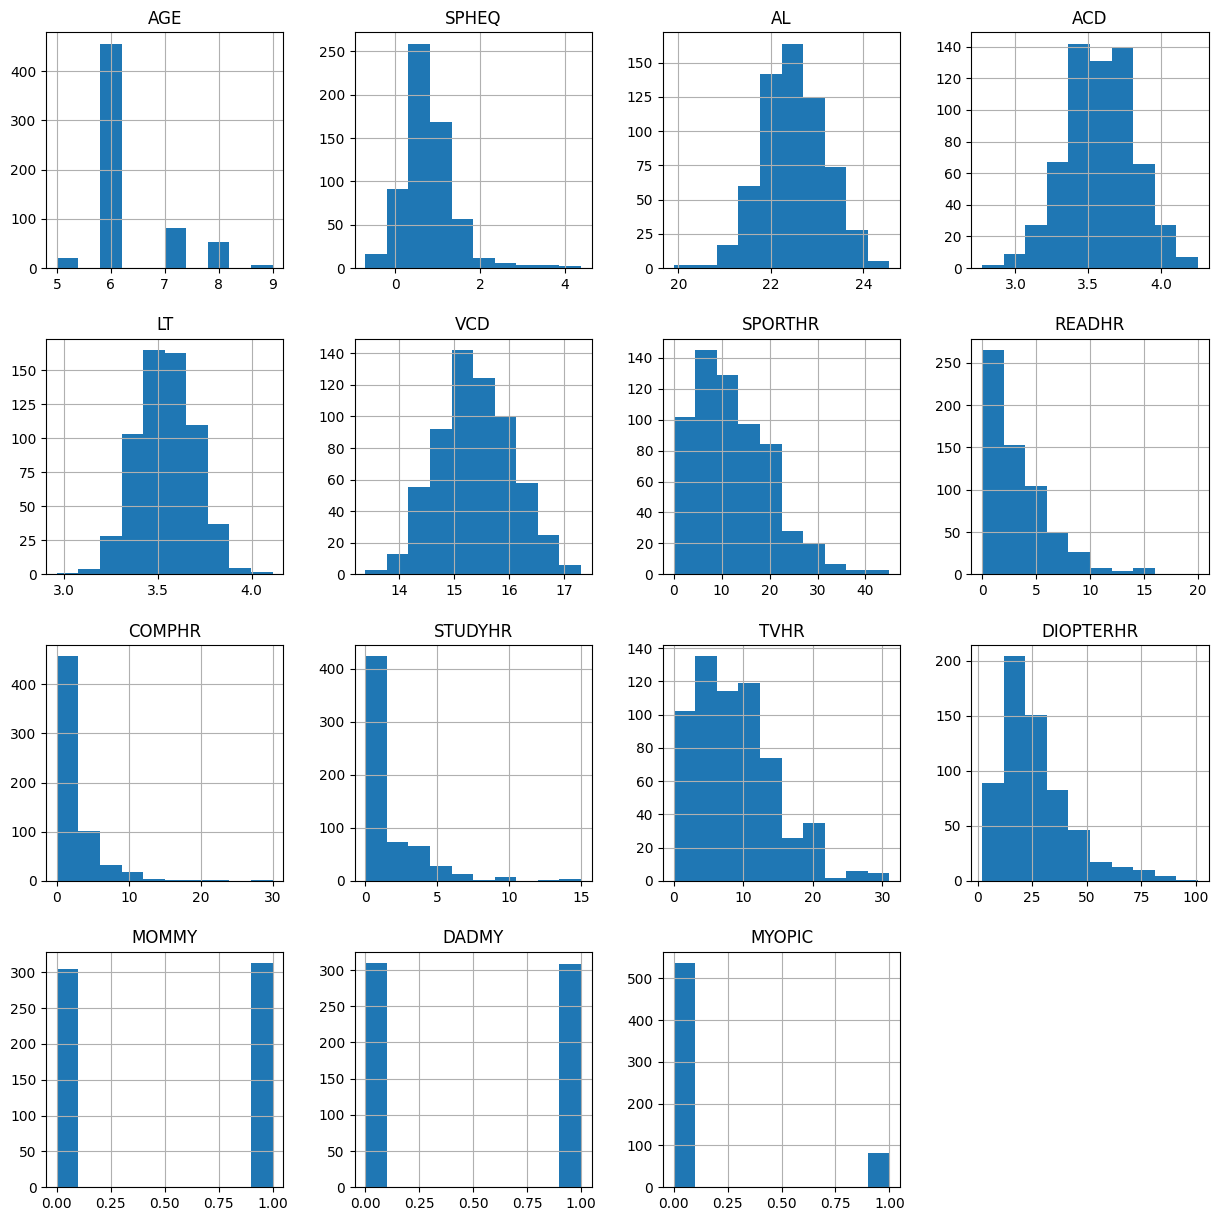

In [12]:
df.hist(figsize = (15, 15))

In [13]:
labels = df["MYOPIC"]
df_drop = df.drop(columns=["MYOPIC"])

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_drop)
print(scaled_data.shape)

normalized_data = normalize(df_drop)
print(normalized_data.shape)

(618, 14)
(618, 14)


In [15]:
scaled_data[:5]

array([[-0.42021911, -1.3639169 , -0.89286146,  0.48378402, -0.28144315,
        -1.0197916 ,  4.1506609 ,  1.69744958, -0.68931054, -0.67299591,
         0.18405806,  0.49830393,  0.98713773,  1.0032415 ],
       [-0.42021911, -0.30861224, -0.1718398 ,  0.53591028, -0.96799728,
        -0.13076253, -0.99889822, -0.91206246, -0.36187479, -0.22140908,
        -0.34093217, -0.87508755,  0.98713773,  1.0032415 ],
       [-0.42021911,  0.60438629, -0.00997682, -0.5066285 , -0.17781207,
         0.21580879,  0.25709181, -0.91206246, -0.03443904, -0.67299591,
         0.18405806, -0.75023378, -1.01302987, -0.99676897],
       [-0.42021911, -0.4413248 , -0.43670267,  1.23093648,  0.4569273 ,
        -0.97458715,  0.75948782,  2.6760166 , -0.68931054, -0.67299591,
        -0.86592239,  0.68558458, -1.01302987,  1.0032415 ],
       [-1.82397807, -0.16630592,  1.16720365,  0.42296952, -0.56642745,
         1.18017813,  0.25709181, -0.91206246, -0.68931054, -0.67299591,
        -0.86592239, -1.37

In [16]:
normalized_data[:5]

array([[ 0.09365725, -0.0008117 ,  0.34169285,  0.05759921,  0.05460217,
         0.22946025,  0.70242936,  0.12487633,  0.        ,  0.        ,
         0.15609541,  0.5307244 ,  0.01560954,  0.01560954],
       [ 0.18886717,  0.01913854,  0.70447453,  0.11653104,  0.10677291,
         0.48129651,  0.12591145,  0.        ,  0.03147786,  0.03147786,
         0.22034503,  0.37773434,  0.03147786,  0.03147786],
       [ 0.16612953,  0.03264445,  0.62270883,  0.09585673,  0.09729652,
         0.42972172,  0.38763556,  0.        ,  0.05537651,  0.        ,
         0.27688254,  0.38763556,  0.        ,  0.        ],
       [ 0.11755557,  0.01028611,  0.43495562,  0.0756666 ,  0.07076845,
         0.28859891,  0.35266671,  0.21551854,  0.        ,  0.        ,
         0.07837038,  0.72492601,  0.        ,  0.01959259],
       [ 0.15189932,  0.02117477,  0.70754704,  0.11167638,  0.10493205,
         0.49093859,  0.42531809,  0.        ,  0.        ,  0.        ,
         0.12151945,  0.12

# PART 2: Apply Dimensionality Reduction

In [17]:
from sklearn.decomposition import PCA

# Initialize PCA model

pca = PCA(n_components=0.90)

myopia_pca_scaled = pca.fit_transform(scaled_data)
myopia_pca_normed = pca.fit_transform(normalized_data)

In [18]:
print(myopia_pca_scaled.shape) # 14 features reduced to 10
print(myopia_pca_normed.shape) # 14 features reduced to 3

(618, 10)
(618, 3)


In [19]:
myopia_pca_scaled[:5]

array([[ 0.53550271,  1.14500427, -1.38501894,  0.11600593, -3.22669052,
        -1.92845879, -1.95889156, -1.92299652,  0.02675285,  0.17814386],
       [-0.62470559, -1.57578643, -0.79425306,  1.156287  ,  0.2922565 ,
         0.34906013, -0.45520626,  0.28533229,  0.68968261, -0.55703083],
       [-0.93347937, -0.71707622,  0.82014993, -1.54763797,  0.17394083,
         0.27278253,  0.02582071, -0.03081701, -0.43149908,  0.01333582],
       [ 0.10635389,  1.19247533, -0.02444121,  1.50746887, -2.35683613,
        -0.0231395 ,  0.23641821, -1.71710865, -1.23078466, -0.70340024],
       [-0.38850272, -2.83965519, -0.22976681, -0.62250959,  0.27145774,
        -0.92895647,  0.53789959, -1.30178657,  0.27900699,  0.63118278]])

In [20]:
myopia_pca_normed[:5]

array([[ 0.08469139,  0.49172014, -0.07989986],
       [-0.23869879, -0.18058087,  0.05653302],
       [-0.19992266,  0.09996213,  0.09022754],
       [ 0.21598647,  0.09940598, -0.16658248],
       [-0.48738538,  0.12183941, -0.03452656]])

In [21]:
 # Transform PCA data to a DataFrame
    
df_myopia_pca_scaled = pd.DataFrame(
    data=myopia_pca_scaled,
    columns=["pc_1", "pc_2", "pc_3", "pc_4", "pc_5", "pc_6", "pc_7", "pc_8", "pc_9", "pc_10"]
)

print(df_myopia_pca_scaled.shape)

df_myopia_pca_scaled.head()

(618, 10)


,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,pc_10
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


In [22]:
 # Transform PCA data to a DataFrame
    
df_myopia_pca_normed = pd.DataFrame(
    data=myopia_pca_normed,
    columns=["pc_1", "pc_2", "pc_3"]
)

print(df_myopia_pca_normed.shape)

df_myopia_pca_normed.head()

(618, 3)


,pc_1,pc_2,pc_3
0,0.084691,0.491720,-0.079900
1,-0.238699,-0.180581,0.056533
2,-0.199923,0.099962,0.090228
3,0.215986,0.099406,-0.166582
4,-0.487385,0.121839,-0.034527


In [36]:
from sklearn.manifold import TSNE

tsne_df1 = df_myopia_pca_scaled.copy()
tsne_df2 = df_myopia_pca_normed.copy()


 # Initialize t-SNE model
    
tsne = TSNE(learning_rate=20)

In [37]:
 # Reduce dimensions
    
tsne_features1 = tsne.fit_transform(tsne_df1)
tsne_features2 = tsne.fit_transform(tsne_df2)

d:\python_projects_fall2022\.venv\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\python_projects_fall2022\.venv\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [38]:
print(tsne_features1.shape) # Reduced 10 primary components down to 2
print(tsne_features2.shape) # Reduced 3 primary components down to 2

(618, 2)
(618, 2)


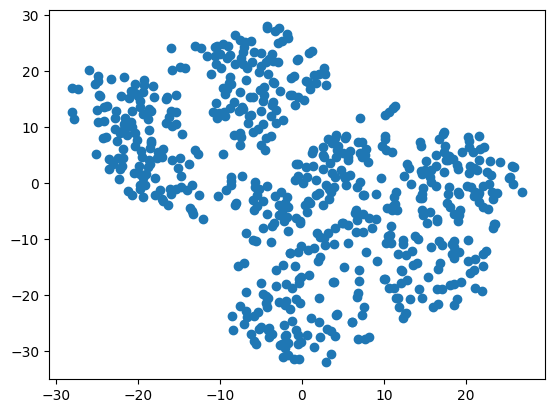

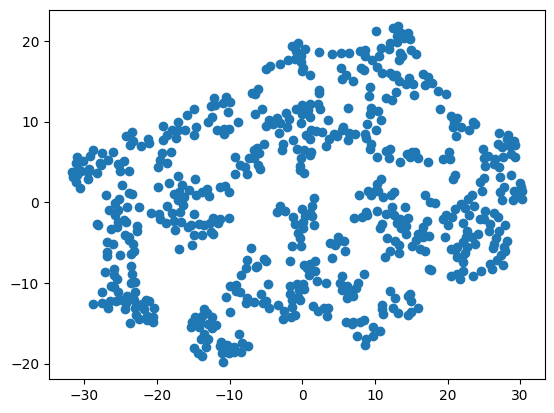

In [39]:
# Prepare to plot the dataset

# The first column of transformed features

tsne_df1["x"] = tsne_features1[:, 0]
tsne_df2["x"] = tsne_features2[:, 0]

# The second column of transformed features

tsne_df1["y"] = tsne_features1[:, 1]
tsne_df2["y"] = tsne_features2[:, 1]

# Visualize the clusters
    
plt.scatter(tsne_df1["x"], tsne_df1["y"])
plt.show()

plt.scatter(tsne_df2["x"], tsne_df2["y"])
plt.show()

In [40]:
labels.value_counts()

0    537
1     81
Name: MYOPIC, dtype: int64

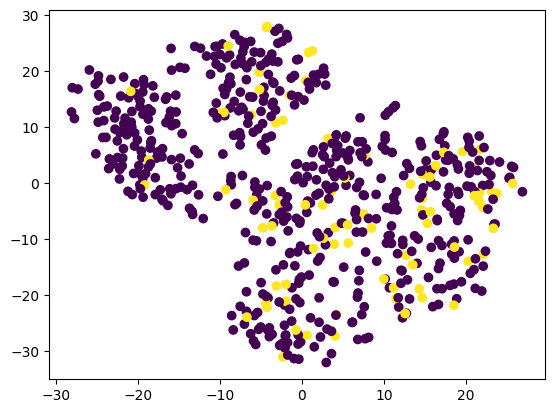

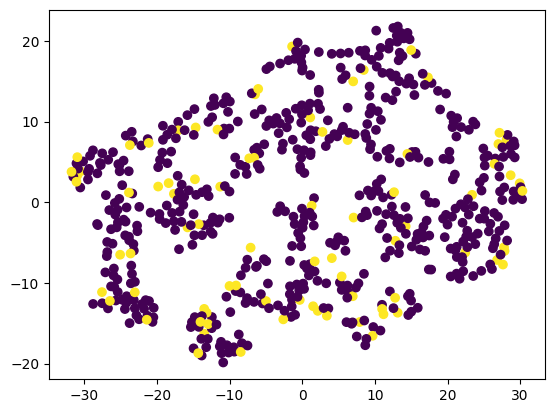

In [41]:
 # Visualize the clusters with color
    
plt.scatter(tsne_df1["x"], tsne_df1["y"], c=labels)
plt.show()

plt.scatter(tsne_df2["x"], tsne_df2["y"], c=labels)
plt.show()

At this point in the analysis, it appears that there are no discernable clusters. 

# PART 3: Perform a Cluster Analysis with K-means

In [42]:
 # Do this on Windows machines before importing KMeans to avoid a known bug (memory leak). 
    
import os
os.environ["OMP_NUM_THREADS"] = '1'

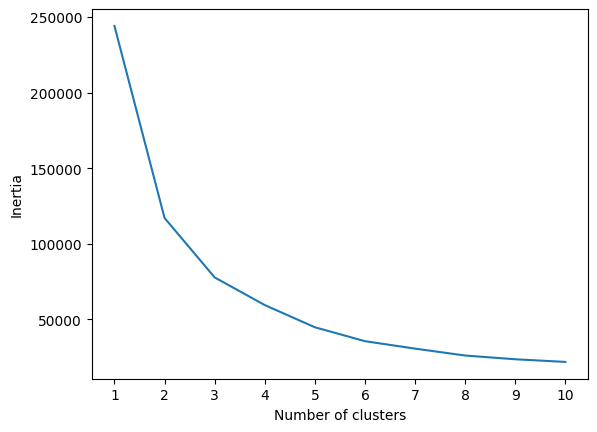

In [43]:
from sklearn.cluster import KMeans

inertia = []

k = list(range(1,11))

# Looking for the best k

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(tsne_df1)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot

elbow_data1 = {"k": k, "inertia": inertia}
df_elbow1 = pd.DataFrame(elbow_data1)

plt.plot(df_elbow1["k"], df_elbow1["inertia"])
plt.xticks(range(1,11))
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

The elbow of the above chart appears to be 5.

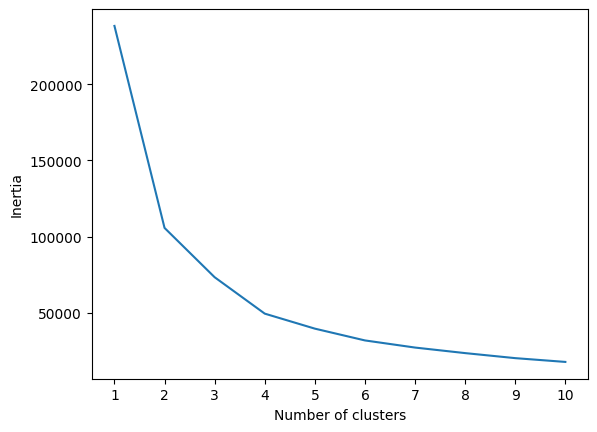

In [44]:
inertia = []

k = list(range(1,11))

# Looking for the best k

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(tsne_df2)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot

elbow_data2 = {"k": k, "inertia": inertia}
df_elbow2 = pd.DataFrame(elbow_data2)

plt.plot(df_elbow2["k"], df_elbow2["inertia"])
plt.xticks(range(1,11))
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

The elbow of the above chart appears to be 4.

In [46]:
# Initializing model with K = 5 
    
model = KMeans(n_clusters=5, random_state=0)

model.fit(tsne_df1)

 # Get predictions
    
predictions1 = model.predict(tsne_df1)

print(predictions1)

print(set(model.labels_))

labels1 = model.labels_

[4 4 1 3 0 3 3 1 1 1 2 0 1 1 0 1 1 0 2 1 3 3 3 4 3 1 4 0 4 0 0 2 0 3 0 1 2
 3 3 3 4 1 2 0 0 3 2 3 0 2 4 3 3 0 3 3 4 2 3 3 3 0 1 3 2 0 1 3 1 1 4 2 2 2
 3 0 1 2 3 3 4 3 0 0 3 0 4 2 0 4 1 1 0 3 3 4 3 0 0 0 2 1 2 1 4 3 1 1 4 3 2
 3 2 2 4 4 1 3 0 3 4 1 0 1 2 4 1 0 4 0 0 3 4 1 4 3 1 0 1 2 0 3 4 3 4 2 3 2
 0 2 0 1 2 2 1 1 0 2 0 0 3 3 2 3 0 2 2 3 2 1 0 4 2 1 0 3 0 4 4 0 3 2 1 0 1
 2 0 4 3 0 4 0 0 3 4 3 1 3 4 4 0 0 3 1 1 4 4 3 4 4 2 0 4 4 0 0 2 3 3 2 4 3
 2 1 1 2 2 2 1 3 2 0 4 2 0 4 4 1 1 1 2 4 1 3 0 3 0 0 2 3 0 2 4 2 0 0 0 0 0
 3 2 1 0 0 4 1 4 0 1 3 3 1 1 2 3 0 3 0 2 4 2 2 0 4 0 0 1 4 3 1 1 3 4 1 2 1
 1 3 2 3 1 4 4 2 0 0 2 1 3 2 4 4 3 4 4 4 0 3 4 2 2 4 0 2 4 1 1 4 1 3 3 4 1
 4 4 1 4 0 3 3 0 3 1 0 0 0 0 2 2 3 1 3 4 1 1 3 4 3 4 1 4 0 1 3 3 4 3 3 1 3
 4 1 1 4 2 4 1 3 4 1 4 4 1 0 4 2 1 2 0 2 0 2 1 4 4 1 1 4 3 1 3 3 0 4 2 1 0
 2 1 2 0 0 4 0 3 1 4 3 1 3 4 2 3 0 4 0 1 4 0 3 2 0 1 1 4 2 0 4 4 2 0 4 1 2
 4 3 0 0 1 2 2 2 0 2 1 2 1 3 0 2 4 3 3 4 2 3 4 2 3 4 0 2 1 0 2 0 0 1 1 2 0
 0 4 2 3 4 1 2 0 2 2 1 1 

In [47]:
# Initializing model with K = 4 
    
model = KMeans(n_clusters=4, random_state=0)

model.fit(tsne_df2)

 # Get predictions
    
predictions2 = model.predict(tsne_df2)

print(predictions2)

print(set(model.labels_))

labels2 = model.labels_

[0 2 0 3 0 3 3 0 2 0 3 2 2 0 1 2 1 1 3 0 3 2 2 3 0 0 0 1 2 2 1 3 3 0 1 3 3
 1 2 1 0 2 3 0 0 2 3 2 1 3 2 2 2 2 0 3 0 2 2 1 3 1 3 2 3 3 2 2 1 2 3 2 3 3
 2 1 2 3 3 1 2 1 2 1 2 2 3 3 2 1 0 2 1 3 0 3 1 2 1 1 3 2 3 3 3 3 2 0 1 0 3
 0 2 0 2 2 0 2 1 3 1 1 1 0 3 3 1 2 2 2 1 0 3 1 0 2 2 2 1 3 2 0 2 2 1 0 0 1
 2 3 1 1 3 2 1 2 2 1 2 1 1 0 0 0 1 0 3 0 3 2 2 3 3 0 2 0 2 2 3 2 1 3 1 1 0
 3 2 2 0 1 0 1 0 0 1 3 0 0 2 3 0 2 1 0 0 0 3 1 2 3 3 1 1 0 1 1 3 2 2 3 2 0
 3 2 2 3 3 1 1 2 3 3 1 3 2 2 1 3 2 0 3 3 0 0 2 1 0 0 3 1 1 3 2 3 2 1 0 2 0
 2 0 2 2 0 2 2 0 2 2 2 2 2 1 3 0 2 0 2 3 0 2 3 1 3 1 2 1 3 1 0 2 0 3 2 3 0
 2 2 3 0 2 0 3 1 1 0 3 2 1 3 3 2 3 2 2 3 2 1 1 3 3 3 1 3 0 3 2 1 0 1 1 2 2
 1 2 0 0 2 3 1 1 0 2 1 0 1 0 1 3 1 2 0 1 1 2 1 2 2 3 0 2 2 1 1 1 0 1 3 0 0
 3 0 0 0 3 3 0 3 1 1 3 2 2 0 1 3 2 3 0 3 2 3 0 0 0 0 1 0 2 1 0 2 3 3 3 3 3
 3 3 3 2 0 1 3 1 3 2 0 2 0 3 3 2 0 3 1 2 3 0 1 3 1 2 1 0 1 1 3 1 3 2 0 0 3
 1 0 0 1 0 3 3 3 3 1 0 1 3 2 1 0 1 0 1 0 3 0 1 3 1 3 2 3 2 2 3 0 2 0 2 1 0
 0 1 3 1 0 0 3 2 3 3 0 2 

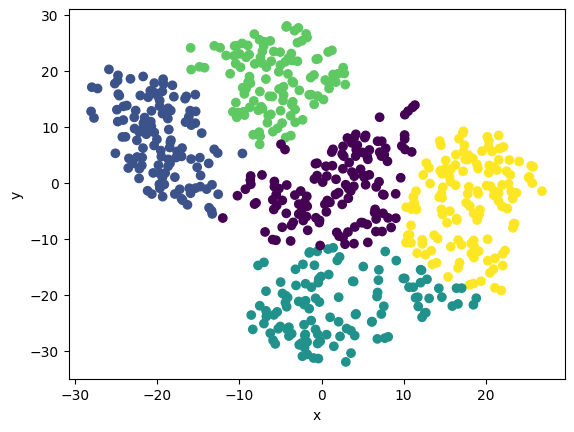

In [48]:
plt.scatter(tsne_df1["x"], tsne_df1["y"], c=labels1)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

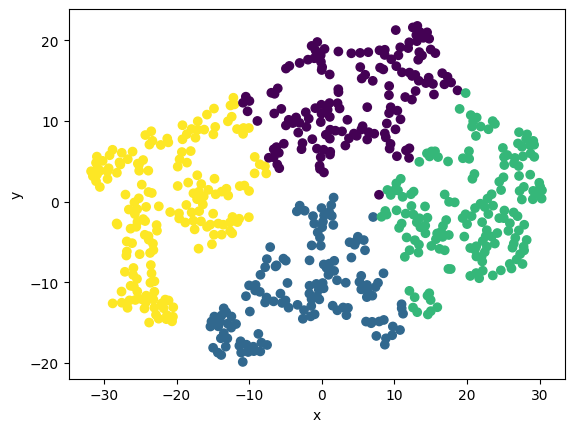

In [49]:
plt.scatter(tsne_df2["x"], tsne_df2["y"], c=labels2)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# PART 4: Make a Recommendation